In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from embryo_segmenting import *
from resnet_unet import *
from deeplabv3 import *

In [3]:
import torch.optim as optim
from torch.optim import lr_scheduler

In [4]:
data_dir = '../dataset'
image_datasets = {x: Dataset(os.path.join(data_dir, x), image_size=513, mask_size=65, is_deeplab=True)
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=3, 
                                             shuffle=True, num_workers=4, drop_last=True)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

num_class = 2

model = DeepLabV3(
        n_classes=num_class,
        n_blocks=[3, 4, 23, 3],
        atrous_rates=[6, 12, 18],
        multi_grids=[1, 2, 4],
        output_stride=8,
    ).to(device)

optimizer_ft = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-4)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=10, gamma=0.1)        

cuda:0


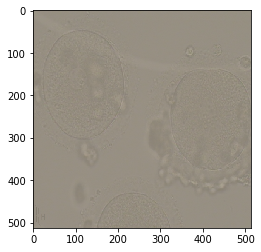

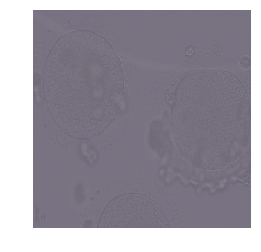

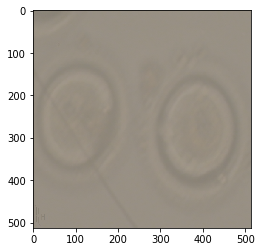

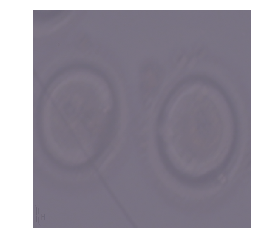

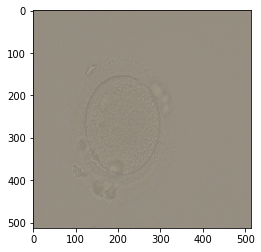

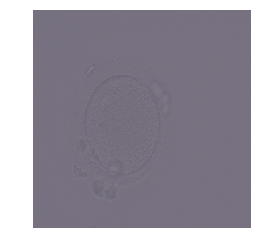

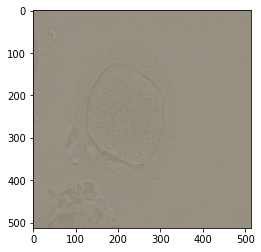

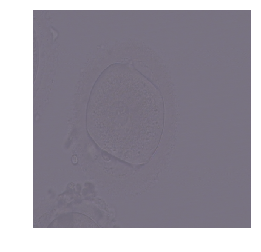

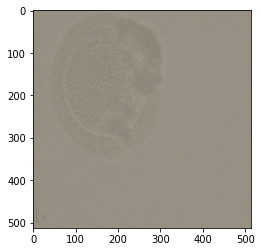

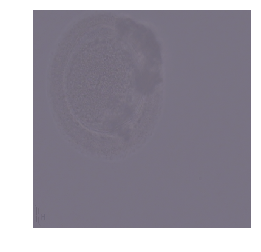

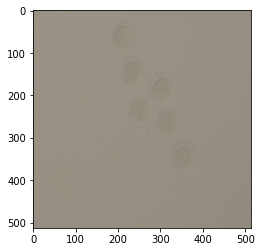

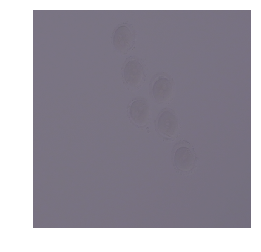

In [6]:
visualize_segmenter(model, dataloaders['val'], device)

In [7]:
model = train_model(model, optimizer_ft, exp_lr_scheduler, dataloaders, device, num_epochs=15)

Epoch 0/14
----------
LR 0.0001
train: bce: 0.343512, dice: 0.332649, loss: 0.338081
val: bce: 0.225452, dice: 0.258234, loss: 0.241843
saving best model
10m 56s
Epoch 1/14
----------
LR 0.0001
train: bce: 0.185487, dice: 0.203604, loss: 0.194546
val: bce: 0.170554, dice: 0.189243, loss: 0.179898
saving best model
10m 56s
Epoch 2/14
----------
LR 0.0001
train: bce: 0.124784, dice: 0.136447, loss: 0.130615
val: bce: 0.095749, dice: 0.098002, loss: 0.096876
saving best model
10m 56s
Epoch 3/14
----------
LR 0.0001
train: bce: 0.090582, dice: 0.097391, loss: 0.093987
val: bce: 0.075026, dice: 0.083775, loss: 0.079401
saving best model
10m 56s
Epoch 4/14
----------
LR 0.0001
train: bce: 0.076726, dice: 0.076668, loss: 0.076697
train: bce: 0.065382, dice: 0.063724, loss: 0.064553
train: bce: 0.054537, dice: 0.052027, loss: 0.053282
val: bce: 0.060338, dice: 0.052111, loss: 0.056224
saving best model
10m 56s
Epoch 7/14
----------
LR 0.0001
train: bce: 0.049578, dice: 0.046756, loss: 0.048167

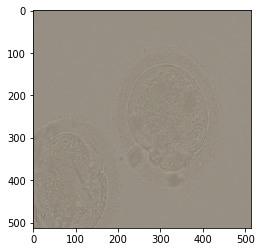

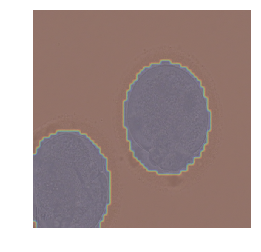

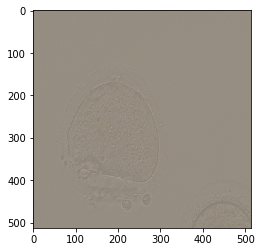

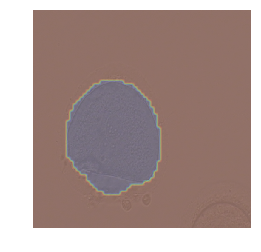

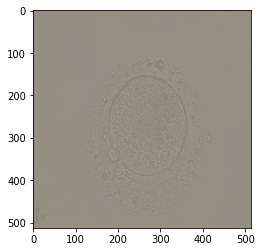

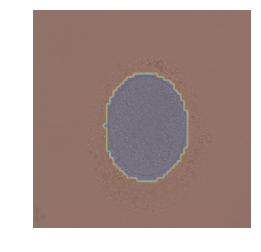

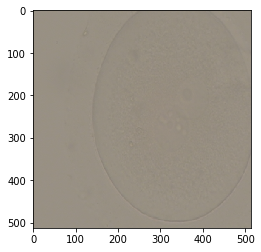

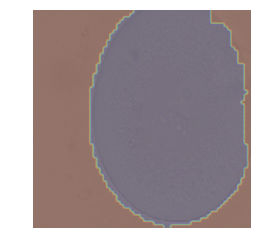

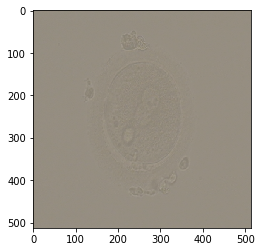

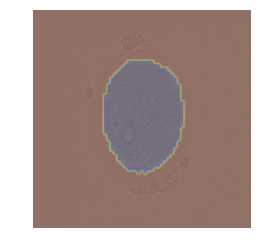

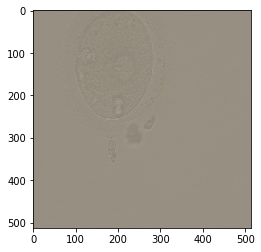

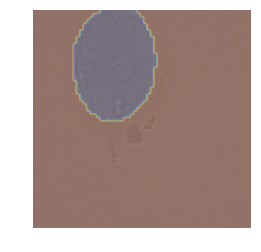

In [8]:
visualize_segmenter(model, dataloaders['val'], device)

In [9]:
results = score_segmenter(model, dataloaders, device)
print(results)

0.9025105361887654
